<a href="https://colab.research.google.com/github/chacha86/pythonai2/blob/main/%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80_%EC%BB%A8%EC%85%89%EA%B3%BC_%EB%8B%A4%ED%95%AD%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## 선형회귀 컨셉은 가장 데이터를 잘 추정하는 직선(기울기) 찾기
## 직선은 w * x + b 로 표현
## w는 기울기(계수, 가중치), b는 절편(편향), x는 특성(길이, 무게 등)

In [3]:
import pandas as pd

fish = pd.read_csv('/content/Fish.csv')
## 회귀 -> 수치 예측
## 길이 -> 무게 예측

fish_data = fish[['Length1', 'Weight']]


In [4]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(fish_data)
s_data = ss.transform(fish_data)

s_data_df = pd.DataFrame(s_data, columns=['Length1', 'Weight'])

<Axes: xlabel='Length1', ylabel='Weight'>

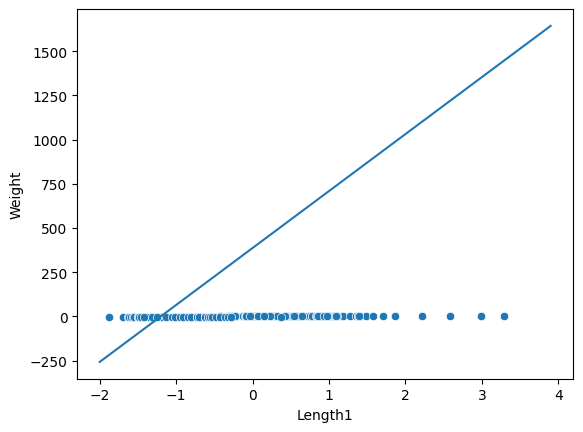

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


sns.scatterplot(data=s_data_df, x='Length1', y='Weight')

def my_fun(x) :
   return 322.13718809  * x + 386.79448818897646

x = np.arange(-2, 4, 0.1)
y = my_fun(x)

sns.lineplot(x=x, y=y)

In [6]:
train = fish[['Length1']]
target = fish['Weight']

In [7]:
from sklearn.model_selection import train_test_split

trd, tsd, trt, tst = train_test_split(train, target, train_size=0.8, random_state=42)

In [49]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler() # 표준화 변환기

## 언어 90점, 수학 90점

ss.fit(trd) # 표준화 대상 그룹
s_trd = ss.transform(trd)
s_trd_df = pd.DataFrame(s_trd, columns=trd.columns.values)
s_tsd = ss.transform(tsd)
s_tsd_df = pd.DataFrame(s_tsd, columns=tsd.columns.values)

In [36]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(s_trd_df, trt)

lr.score(s_trd_df, trt), lr.score(s_tsd_df, tst)

(0.844170424366534, 0.8116084146869397)

In [ ]:
## coef -> 모델이 찾은 최적의 w값
## intercept -> 모델이 찾은 최적의 b값

lr.coef_, lr.intercept_


<Axes: xlabel='Length1', ylabel='Weight'>

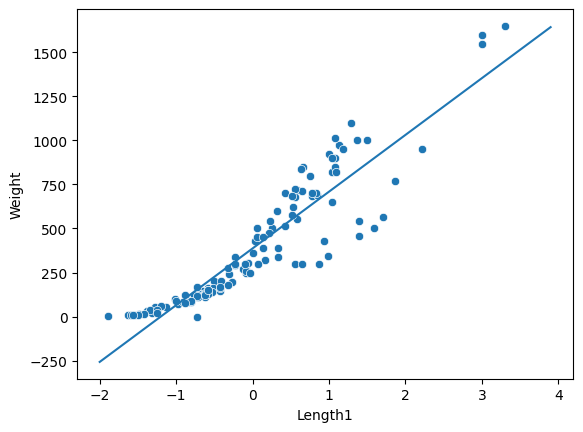

In [101]:
## 모델이 찾은 값을 이용해 직선(1차 함수)를 표현
def my_fun1(x) :
   return 322.13718809  * x + 386.79448818897646

## 학습 데이터는 표준화된 길이, 타겟 데이터는 원본 무게.
sns.scatterplot(x=s_trd_df['Length1'], y=trt.reset_index(drop=True)) # 물고기 데이터 산점도 시각화
x = np.arange(-2, 4, 0.1) # x축의 범위
y = my_fun(x) # x값에 대한 함수값 y
sns.lineplot(x=x, y=y) # 직선 그리기

In [112]:
## 다항회귀를 이용한 추정
from sklearn.preprocessing import PolynomialFeatures
train = fish[['Length1']]
target = fish['Weight']
trd, tsd, trt, tst = train_test_split(train, target, train_size=0.8, random_state=42)

ss = StandardScaler() # 표준화 변환기

## 언어 90점, 수학 90점

ss.fit(trd) # 표준화 대상 그룹
s_trd = ss.transform(trd)
s_trd_df = pd.DataFrame(s_trd, columns=trd.columns.values)
s_tsd = ss.transform(tsd)
s_tsd_df = pd.DataFrame(s_tsd, columns=tsd.columns.values)




# lr2 = LinearRegression()
# lr2.fit(s_trd_df[['Length_sqr']], trt)
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False)
poly.fit(s_trd_df)
s_poly_trd = poly.transform(s_trd_df)

s_poly_trd_df = pd.DataFrame(s_poly_trd, columns=poly.get_feature_names_out())

lr2 = LinearRegression()
lr2.fit(s_poly_trd_df, trt)


LinearRegression()

In [113]:
## 다항 회귀의 w값과 b값
s_poly_trd_df.columns, lr2.coef_, lr2.intercept_

## 304는 Length1에 대한 계수(w1), 25는 Length1^2에 대한 계수(w2), 361은 절편(b)

(Index(['Length1', 'Length1^2'], dtype='object'),
 array([304.83126351,  25.1727026 ]),
 361.6217855877814)

In [ ]:
## 모델로 부터 얻은 최적의 파라마티를 이용해 2차함수 만들기
def my_fun2(x):
  return x * 304.83126351 + 25.1727026 * x * x + 361.6217855877814

sns.scatterplot(x=s_trd_df['Length1'], y=trt.reset_index(drop=True))

x = np.arange(-2, 4, 0.1) # x축의 범위
y1 = my_fun1(x)
y2 = my_fun2(x)
sns.lineplot(x=x, y=y1, label='fun1') # 1차함수 그리기
sns.lineplot(x=x, y=y2, label='fun2') # 2차함수 포물선 그리기
plt.legend()